In [36]:
pip install pandasql

In [37]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries

import pandasql as psql
import seaborn as sns

In [38]:
ytad= pd.read_csv(r"train.csv", header=0)

#Copy to back-up files

ytad_bk=ytad.copy()

#Display First five claims

ytad.head(20)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [39]:
#display the shape of the file
ytad.shape

(14999, 9)

In [40]:
#To check whether there are any null values or not
ytad.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [41]:
#To check whether there are any Duplicate values or not
ytad.duplicated().sum()

0

In [42]:
print(ytad.dtypes)

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


In [43]:
#To convert the datatype of views into integer
ytad['views'] = ytad['views'].apply(lambda x: int(x) if x.isdigit() else 0)
ytad['views'] = ytad['views'].astype(int)

In [44]:
#To convert the datatype of likes into integer
ytad['likes'] = ytad['likes'].apply(lambda x: int(x) if x.isdigit() else 0)
ytad['likes'] = ytad['likes'].astype(int)

In [45]:
#To convert the datatype of dislikes into integer
ytad['dislikes'] = ytad['dislikes'].apply(lambda x: int(x) if x.isdigit() else 0)
ytad['dislikes'] = ytad['dislikes'].astype(int)

In [46]:
#To convert the datatype of comment into integer
ytad['comment'] = ytad['comment'].apply(lambda x: int(x) if x.isdigit() else 0)
ytad['comment'] = ytad['comment'].astype(int)

In [47]:
ytad['published'] = pd.to_datetime(ytad['published'])

In [48]:
ytad['duration'] = pd.to_timedelta(ytad['duration'])
ytad['duration']= ytad['duration'].dt.total_seconds()

In [49]:
print(ytad.dtypes)

vidid                object
adview                int64
views                 int64
likes                 int64
dislikes              int64
comment               int64
published    datetime64[ns]
duration            float64
category             object
dtype: object


In [50]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
ytad["category"]=ytad["category"].map(category)

In [51]:
ytad.head(20)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457.0,6
1,VID_14135,2,1707,56,2,6,2016-10-01,570.0,4
2,VID_2187,1,2023,25,0,2,2016-07-02,136.0,3
3,VID_23096,6,620860,777,161,153,2016-07-27,262.0,8
4,VID_10175,1,666,1,0,0,2016-06-29,31.0,4
5,VID_10756,4,78,0,0,0,2016-05-09,15.0,4
6,VID_9782,40621,43118,15,1,0,2015-08-21,200.0,4
7,VID_16452,1,14205,55,16,1,2016-08-01,58.0,5
8,VID_18486,1,526015,3064,211,2582,2015-11-06,1670.0,6
9,VID_681,1,406992,3831,310,7839,2016-10-03,679.0,2


In [52]:
if len(ytad['vidid'].unique())==ytad.shape[0]:
  ytad.drop(columns=['vidid'],inplace=True)


In [53]:
ytad.head(20)

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2016-09-14,457.0,6
1,2,1707,56,2,6,2016-10-01,570.0,4
2,1,2023,25,0,2,2016-07-02,136.0,3
3,6,620860,777,161,153,2016-07-27,262.0,8
4,1,666,1,0,0,2016-06-29,31.0,4
5,4,78,0,0,0,2016-05-09,15.0,4
6,40621,43118,15,1,0,2015-08-21,200.0,4
7,1,14205,55,16,1,2016-08-01,58.0,5
8,1,526015,3064,211,2582,2015-11-06,1670.0,6
9,1,406992,3831,310,7839,2016-10-03,679.0,2


In [54]:
q1=ytad['adview'].quantile(0.25)
q3=ytad['adview'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
y=ytad.index[(ytad['adview']<lower)|(ytad['adview']>upper)]
x=y
l=sorted(set(x))
ytad=ytad.drop(l)
ytad.shape

(12667, 8)

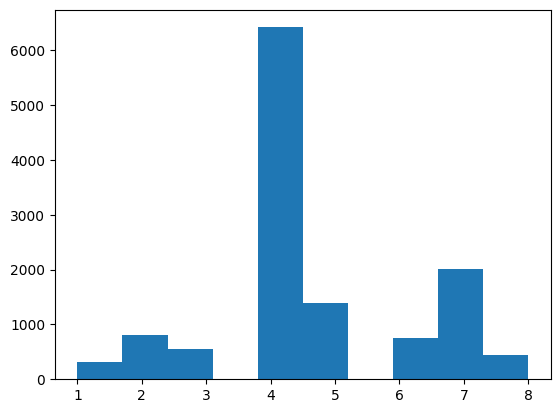

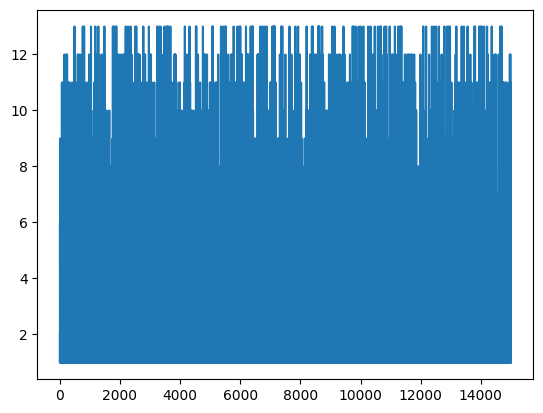

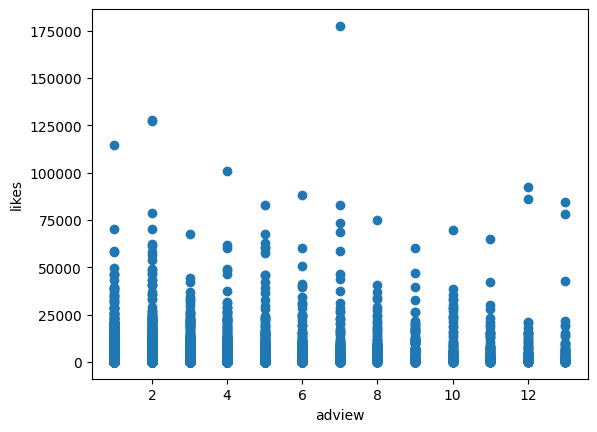

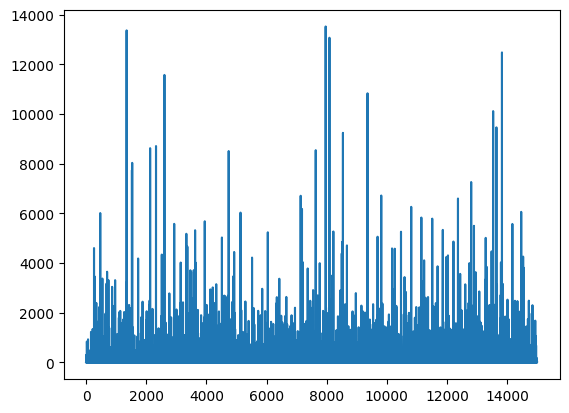

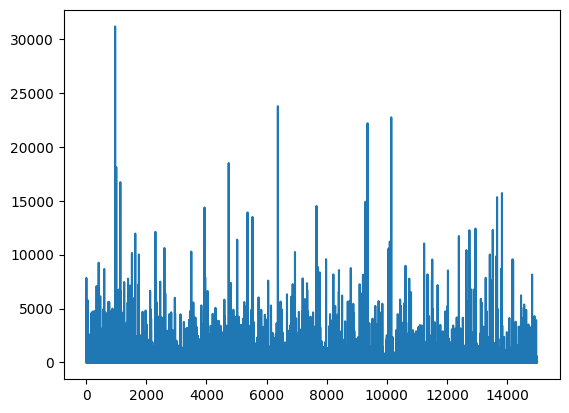

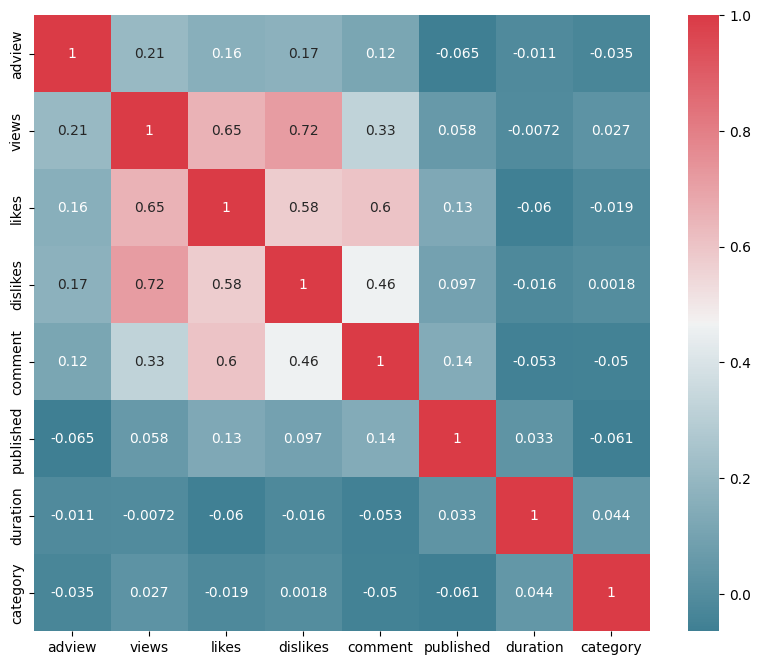

In [55]:
# Visualization
# Individual Plots
plt.hist(ytad["category"])
plt.show()
plt.plot(ytad["adview"])
plt.show()
plt.scatter(ytad['adview'],ytad["likes"])
plt.xlabel("adview")
plt.ylabel("likes")
plt.show()
plt.plot(ytad["dislikes"])
plt.show()
plt.plot(ytad["comment"])
plt.show()
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = ytad.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot=True)
plt.show()

In [56]:
# Split Data
Y_train = pd.DataFrame(data = ytad.iloc[:, 1].values, columns = ['target'])
ytad=ytad.drop(["adview"],axis=1)
print(ytad.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ytad, Y_train, test_size=0.2, random_state=42)
print(X_train.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Convert datetime column to numerical representation
X_train['published'] = X_train['published'].astype(int)
X_test['published'] = X_test['published'].astype(int)

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.mean()

    views  likes  dislikes  comment  published  duration  category
1    1707     56         2        6 2016-10-01     570.0         4
2    2023     25         0        2 2016-07-02     136.0         3
3  620860    777       161      153 2016-07-27     262.0         8
4     666      1         0        0 2016-06-29      31.0         4
5      78      0         0        0 2016-05-09      15.0         4
(10133, 7)


0.19880107991289966

In [57]:
# Evaluation Metrics
from sklearn import metrics
mse={}
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  mse.update({int(metrics.mean_squared_error(y_test, prediction)):model_name})
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
  # Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 7.28380781056472e-08
Mean Squared Error: 8.527597905753344e-15
Root Mean Squared Error: 9.234499393986305e-08
Mean Absolute Error: 476238.7611173187
Mean Squared Error: 1413273985590.6577
Root Mean Squared Error: 1188812.0059919725


In [58]:
from sre_constants import error
print('Decision Tree Regressor')
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test,decision_tree)
print('Random Forest Regressor')
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

Decision Tree Regressor
Mean Absolute Error: 2381.4214680347277
Mean Squared Error: 1162308790.4056828
Root Mean Squared Error: 34092.65009361524
Random Forest Regressor
Mean Absolute Error: 4629.300783936507
Mean Squared Error: 5640476802.900267
Root Mean Squared Error: 75103.10781119691


In [59]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu",input_shape=X_train.shape[1:]),Dense(6,activation="relu"),Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss='mean_squared_error',metrics=["mean_squared_error"])
history=ann.fit(X_train_scaled,y_train,epochs=10)
ann.summary()
#print(ann)
print_error(X_test,y_test,ann)

Epoch 1/10
317/317 [==============================] - 3s 4ms/step - loss: 2303304663040.0000 - mean_squared_error: 2303304663040.0000
Epoch 2/10
317/317 [==============================] - 1s 4ms/step - loss: 2303295750144.0000 - mean_squared_error: 2303295750144.0000
Epoch 3/10
317/317 [==============================] - 1s 3ms/step - loss: 2303266390016.0000 - mean_squared_error: 2303266390016.0000
Epoch 4/10
317/317 [==============================] - 1s 3ms/step - loss: 2303198756864.0000 - mean_squared_error: 2303198756864.0000
Epoch 5/10
317/317 [==============================] - 1s 3ms/step - loss: 2303086559232.0000 - mean_squared_error: 2303086559232.0000
Epoch 6/10
317/317 [==============================] - 1s 4ms/step - loss: 2302925078528.0000 - mean_squared_error: 2302925078528.0000
Epoch 7/10
317/317 [==============================] - 2s 7ms/step - loss: 2302710382592.0000 - mean_squared_error: 2302710382592.0000
Epoch 8/10
317/317 [==============================] - 2s 6ms/s

In [60]:
#To know the best model
print(mse.get(min(mse.keys())))


LinearRegression()


In [61]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")